Feature Matching

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [46]:
img1 = cv2.imread('book.png',0) # queryImage
img2 = cv2.imread('books.jpg',0) # trainImage

In [47]:
# Initiate SIFT detector
sift = cv2.SIFT_create()


In [48]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [49]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
#matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = matcher.match(des1, des2)

matches = sorted(matches, key = lambda x:x.distance)

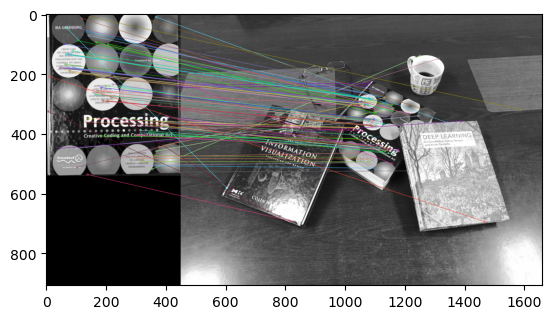

(<matplotlib.image.AxesImage at 0x1944e5b6bb0>, None)

In [50]:
# Draw first 10 matches.
#img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], flags=2)
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:100], None,
                       flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

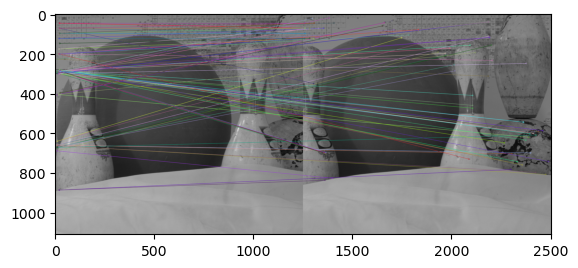

(<matplotlib.image.AxesImage at 0x1944e5f06d0>, None)

In [52]:
img1 = cv2.imread('view1.png',0) # queryImage
img2 = cv2.imread('view5.png',0) # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches[:50],None,flags=2)
plt.imshow(img3),plt.show()